# Projekt - Analiza cen wynajmu z serwisu AirBnb w Nowym Jorku w 2019r.

Link do zbioru danych:

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=down

Skład Grupy

- Paweł Wira 245725
- Krystian Gumuliński 250625
- Konrad Woźniak 232576

## Czym jest AirBnb?

AirBnb to serwis internetowy mający swoją siedzibę w San Francisco, w Kalifornii, który umożliwia wynajem lokali od osób prywatnych. Platforma powstała w 2008 roku przez Braiana Chesky'ego, Nathana Blecharczyka i Joe Gebbia. Portal Airbnb zrzesza miliony osób, chcące wynająć swoje domy. Aktualnie serwis obejmuje ponad 81000 miast z 191 różnych krajów na świecie. AirBnb jest skrótem od AirBedandBreakfast.com.

Polityka przedsiębiorstwa jest uważana przez niektóre grupy za dość kontrowersyjną. Firma była krytykowana przez osoby najmujące za umożliwienie wynajmującym użytkownikom podwyżek czynszów za domy. Konkuruje też bezpośrednio z branżą hotelarską, która zarzuca firmie brak regulacji prawnych. Część hoteli jednak uległa i wystawiła swoje ogłoszenia na platformie, która pobiera opłaty za wystawione oferty mieszkaniowe.

## Cel projektu

Celem projektu jest analiza zbioru danych, w którym znajdują się dane ofert z serwisu Airbnb dla miasta Nowy Jork z roku 2019. Analiza dotyczy zjawisk takich jak korelacja między cenami, standardem mieszkaniowym czy lokalizacją w odległości od najatrakcyjniejszych miejsc miasta. Dodatkowo dotyczy także zależności pomiędzy osobami wynajmującymi dużą liczbę mieszkań a osobami prywatnymi. Po wykonanej analizie zbioru związanego z AirBnb chcielibyśmy, dokonać pobrania danych związanych z przestępcząścią w Nowym Jorku i dokonać sprawdzenia czy ów problem koreluje z parametrami ogłoszeń.

## Zbiór danych użyty w projekcie

Zbiór danych potrzebny do realizacji projektu został pobrany z serwisu kaggle.com i został zaczerpnięty ze strony insideairbnb.com. 

Dane zawierają informację między innymi o lokalizacji i dzielnicach ogłoszeń, o cenach, rodzajach mieszkań czy też ilości dostępnych dni w roku. Zbiór danych może pomóc wskazać cechy osób wynajmujących i obszarów wynajmu oraz jest stworzony z myślą o przyszłych prognozach obrazujących preferencje wynajmu klientów w stosunku do poszczególnych okręgów.

## Podział Administacyjny Nowy Jork

Nowy Jork dzieli się na pięć okręgów, określanych mianem boroughs. Każdy z nich pokrywa się z odpowiednim hrabstwem stanu Nowy Jork. Na terenie pięciu okręgów wyróżnić można setki mniejszych dzielnic, z których wiele posiada własną historię i specyfikę. Jeśli każde z boroughs byłoby niezależnym miastem, cztery z nich (Brooklyn, Queens, Manhattan i Bronx) należałyby do najludniejszych miast w Stanach Zjednoczonych.

- Manhattan (hrabstwo Nowy Jork; populacja w 2019 roku: 1 628 706) – najgęściej zaludniona dzielnica; na jej terenie znajduje się Central Park, World Trade Center i większość nowojorskich wieżowców, stanowi finansowe centrum miasta i siedzibę wielu korporacji, kwatery głównej ONZ, kilku uniwersytetów i licznych kulturowych atrakcji.

- Bronx (hrabstwo Bronx; populacja w 2019 roku: 1 418 207) – najdalej na północ wysunięty okręg Nowego Jorku, siedziba Yankee Stadium (domowego stadionu drużyny New York Yankees) i największej spółdzielni mieszkaniowej w Stanach Zjednoczonych – Co-op City.

- Brooklyn (hrabstwo Kings; populacja w 2019 roku: 2 559 903) – położony w zachodniej części Long Island, najbardziej zaludniony ze wszystkich boroughs; niezależne miasto do 1898 roku. Brooklyn znany jest ze swojej kulturowej, społecznej i etnicznej różnorodności, niezależnej sceny artystycznej, specyfiki poszczególnych dzielnic oraz wyjątkowego zróżnicowania architektonicznego.

- Queens (hrabstwo Queens; populacja w 2019 roku: 2 253 858) – terytorialnie największy borough i najbardziej zróżnicowane etnicznie hrabstwo w Stanach Zjednoczonych. W odróżnieniu jednak od Nowego Jorku, Brooklynu i Bronxu, Queens nie ma statusu odrębnego City. Powstałe z kilkunastu małych miasteczek i wiosek założonych przez Holendrów, obecnie Queens stanowi przede wszystkim obszar mieszkalny dla przedstawicieli klasy średniej.

- Staten Island (hrabstwo Richmond; populacja w 2019 roku: 476 143) – ma najbardziej podmiejski charakter spośród wszystkich pięciu dzielnic Nowego Jorku. Staten Island połączona jest z Brooklynem przez Verrazano-Narrows Bridge, zaś z Manhattanem przez darmowy prom Staten Island Ferry. Staten Island Ferry jest jedną z najpopularniejszych atrakcji turystycznych w Nowym Jorku, jako że zapewnia widok na Statuę Wolności, Wyspę Ellis i dolny Manhattan.

![](img/picture.jpg)

# Implementacja

## Import niezbędnych bilbiotek

Podczas implementacji należy zaimportować odpowiednie biblioteki umożliwiające dalszą pracę przy analizy danych. Zaimportowane zostały podstawowe biblioteki języka Python takie jak np. biblioteka umożliwiająca obliczenia na macierzach, biblioteka pomagająca analizie danych czy biblioteka wizualizacyjna wyniki na wykresach.

In [182]:
#Import niezbędnych bibliotek
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Wczytywanie danych

Pierwszym krokiem realizacji projektu analizy wynajmu mieszkań na podstawie serwisu AirBnb jest zrozumienie danych i wartości występujących w poszczególnych komórkach. Poniżej można zaobsersować rodzaj informacji i jej poszczególny typ.

In [183]:
df = pd.read_csv("data/AB_NYC_2019.csv")
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [184]:
# Ilość wierszy
len(df)

48895

Zbiór danych składa się z 16 kolumn i 48895 wierszy, który zostanie wykorzystany do dalszej eksploracji.

In [185]:
# Wyświetlenie pierwszych 3 wierszy
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Opis kolumn:
- name - Nazwa obiektu 
- host_id - Numer identyfikacyjny wystawiającego ogłoszenie 
- neighbourhood_group - Nazwa okręgu w Nowym Jorku 
- neighbourhood - Nazwa dzielnic w danym okręgu w Nowym Jorku 
- latitude - Szerokość geograficzna longitude - Długość geograficzna
- room_type - Typ wynajmowanego obiektu 
- price - Cena 
- minimum_nights - Minimalna ilość nocy dla danego obiektu, które są określone przez wynajmującego 
- number_of_reviews - Ilość recenzji danego obiektu 
- reviews_per_month - Ilość recenzji danego obiektu przez miesiąc
- calculated_host_listing_count - Ilość wystawionych obiektów na wynajem przez tego użytkownika serwisu 
- availability_365 - Ilość dni w których dany obiekt jest dostępny do wynajęcia

# Transformacja i czyszczenie danych

Proces transformacji i czyszczenia danych składa się z wszelkich operacji, które dostosują treść i format danych do naszych potrzeb. Dla naszego zbioru danych na samym wstępie dokonamy sprawdzenia, czy w zbiorze występują puste rubryki.

In [186]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Następnym krokiem jest sprawdzenie czy dany wiersz jest powielany w zbiorze

In [187]:
df.duplicated().sum()

0

Dokonujemy zastąpienia wartości null w kolumnie reviews_per_month liczbą 0, gdyż wartość null została zapisana w wyniku braku wyświetleń

In [188]:
df.fillna({'reviews_per_month':0}, inplace=True)

Dla wierszy gdzie kolumna name nie ma wartości dajemu NONE

In [189]:
df.fillna({'name':'NONE'}, inplace=True)

W zbiorze danych występują kolumny, które są nam zbędne w procesie analizy danych:

Kolumny do usunięcia:

- id - czyli unikalny numer dla danego ogłoszenia,
- host_name - imię osoby wystawiającej, które jest równoważne z tabelą host_id
- last_review - informacja, która nie będzie przydatna w procesie analizy

In [190]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

Ostatnim krokiem jest ponowne sprawdzenie czy w zbiorze występują jeszcze puste rubryki, które mogą negatywnie wpływać na proces analizowania poszczególnych danych

In [191]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Eksploracja i Wizualizacja danych

Pierwszym krokiem badania naszego zbioru danych jest wyświetlenie macierzy korelacji, która umożliwia nam określenie w jakim stopniu poszczególne cechy są ze sobą powiązane

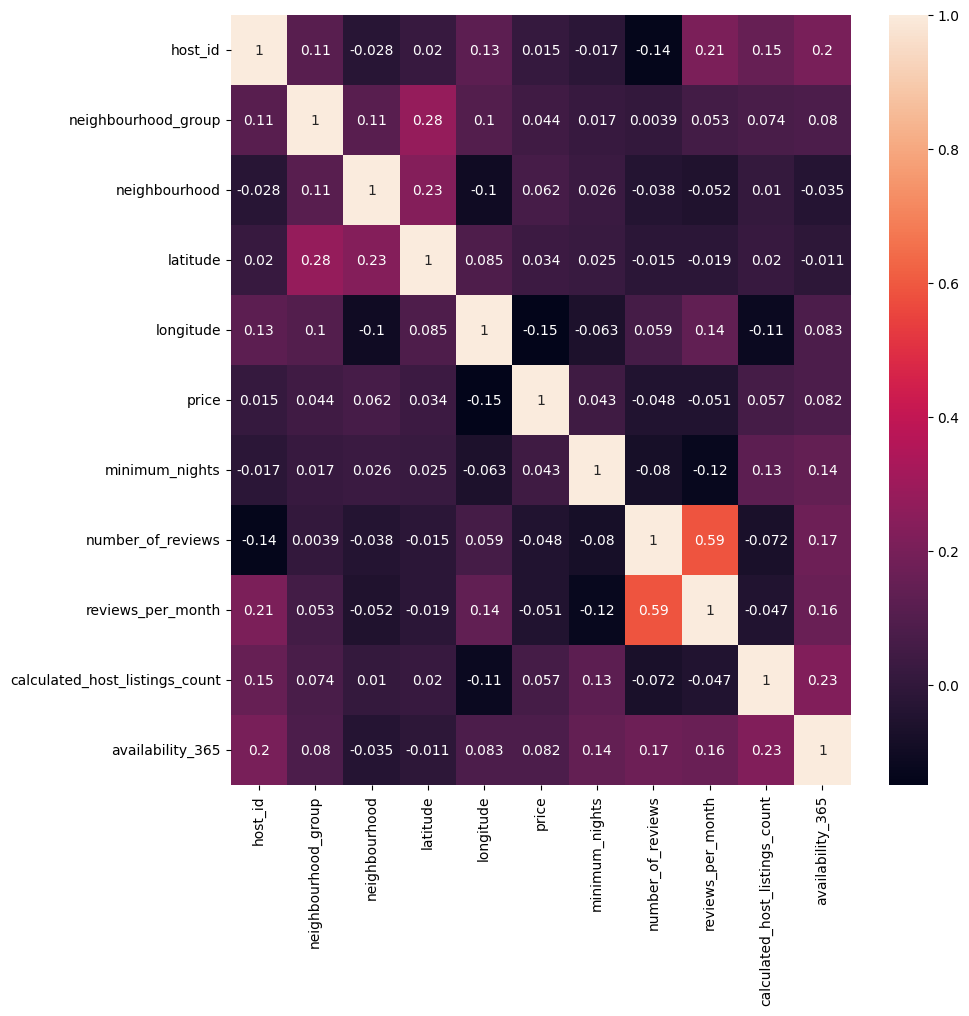

In [192]:
label_encoder = preprocessing.LabelEncoder()
hrabstwo = label_encoder.fit_transform(list(df["neighbourhood_group"]))
hrabstwo_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
dzielnica = label_encoder.fit_transform(list(df["neighbourhood"]))
dzielnica_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df["neighbourhood_group"], df["neighbourhood"] = hrabstwo, dzielnica
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True)

Z powyższe mapy cieplnej wnioskujemy, że poszczególne dane nie są ze sobą powiązane w dużym stopniu oprócz, możemy wyróżnić następującą korelacje:

- reviews_per_month/number_of_reviews - wysoki współczynnik jest wynikiem skalowania drugiej wartośći przez ilość miesięcy w którcyh oogłoszenie było aktywne

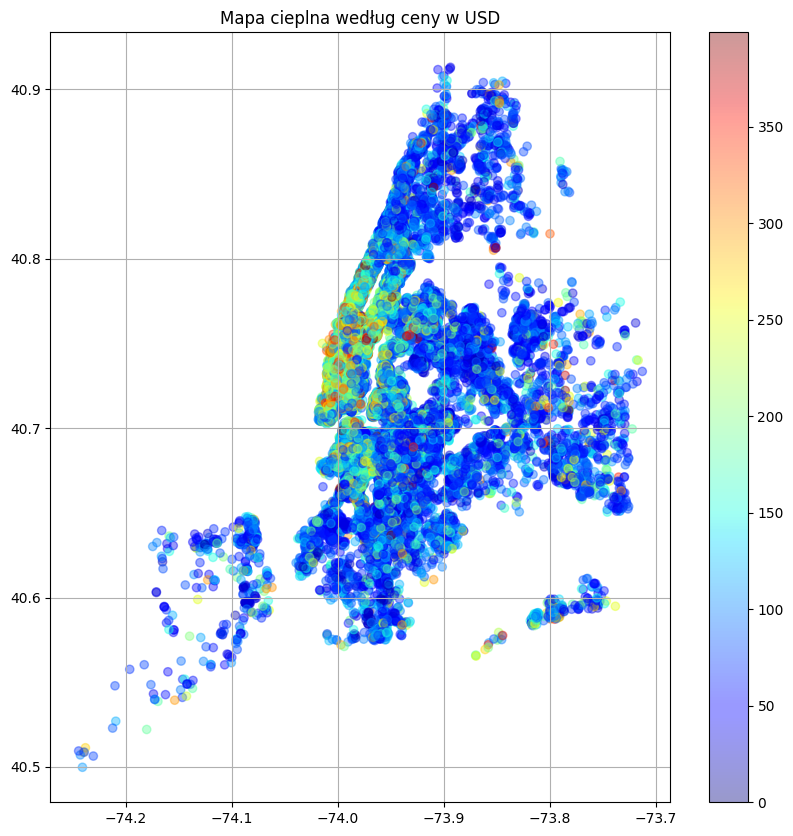

In [193]:

FILTER_PRICE_VALUE = 400
sub_airbnb = df[df.price < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()


Powyższa mapa cieplna obrazuje nam, że w okręgu Mangattan znajdują się najdroższe ogłoszenia, a w okręgu Staten Island jest ich najmniej

## Top 5 wynajmujących pod względem ilości ofert

Zastosowanie rankingu dotyczącego ilości wystawionych ogłoszeń przez jednego wynajmującego pomaga dostrzec skalę oraz charakter korzystania z portalu przez użytkownika. Pozwala też na wyodrębnienie najwyższych wyników portalu pod tym względem w porównaniu do reszty wyników.

In [208]:
top_hosts = (pd.DataFrame(df.host_id.value_counts(), df.number_of_reviews.value_counts)).head(5)
top_hosts.columns=['Liczba ofert']
top_hosts['host_id'] = top_hosts.index
top_hosts.reset_index(drop=True, inplace=True)
top_hosts

,Liczba ofert,host_id
0,327,219517861
1,232,107434423
2,121,30283594
3,103,137358866
4,96,16098958


Użytkownik na najwyższym poziomie rankingu ofert wystawił dokładnie 327 mieszkań, jednak jest to odosobniony przypadek, ponieważ już drugi użytkownik w rankingu miał tych ofert o prawie 100 mniej. Jedynie 4 użytkowników z serwisu wystawiało ponad 100 ofert, więc zdecydowana większość wynajmujących osób nie przekroczy tej bariery.

## Top 5 Okręgi pod względem ilości ofert

Wyodrębnienie ilości ogłoszeń ze względu na dzielnice pomaga zaobserwować "popularność" okręgów Nowego Jorku. Podział ilości ogłoszeń na okręgi pozwala stwierdzić, które z nich są najbardziej przyjazne potencjalnym najemcom. Oznacza to także atrakcyjność danego obszaru, ponieważ większa sieć mieszkań do wynajęcia może współgrać z większym skupiskiem ludności danej przestrzeni, co także może przełożyć się na bogatsze i bezpieczniejsze warunki życiowe ludności.

In [195]:
top_neigh = pd.DataFrame(df['neighbourhood_group'].value_counts().head(5))
top_neigh.columns=['Liczba ofert']
top_neigh['Okręg'] = top_neigh.index
top_neigh.reset_index(drop=True, inplace=True)
top_neigh

,Liczba ofert,Okręg
0,21661,2
1,20104,1
2,5666,3
3,1091,0
4,373,4


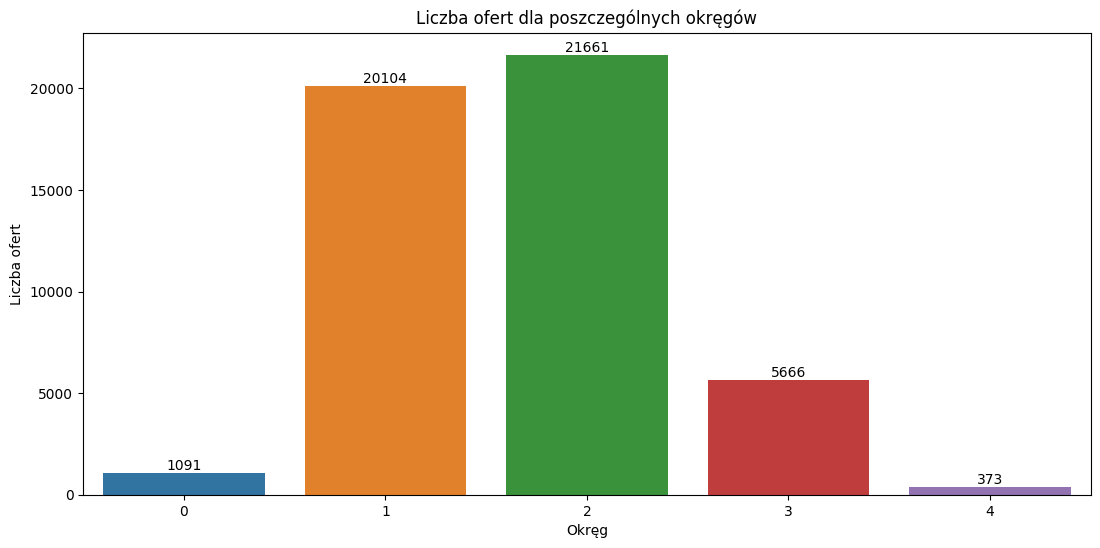

In [196]:
f,ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=df.neighbourhood_group)
ax.bar_label(ax.containers[0])
plt.xlabel("Okręg")
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert dla poszczególnych okręgów")
plt.show()

W aspekcie ilości ofert podzielonej na okręgi przoduje Manhattan, jednak zaraz za nim jest Brooklyn z minimalną różnicą ofert. Między tymi dwoma okręgami jest zauważalna natomiast spora różnica pomiędzy pozostałymi okręgami. Queens plasujące się na trzecim miejscu posiada prawie czterokrotnie mniej ilości ofert od przodujących okręgach. Ostatnie dwa okręgi mają w porównaniu do innych przestrzeni Nowego Jorku niewielką liczbe ofert na portalu AirBnb.

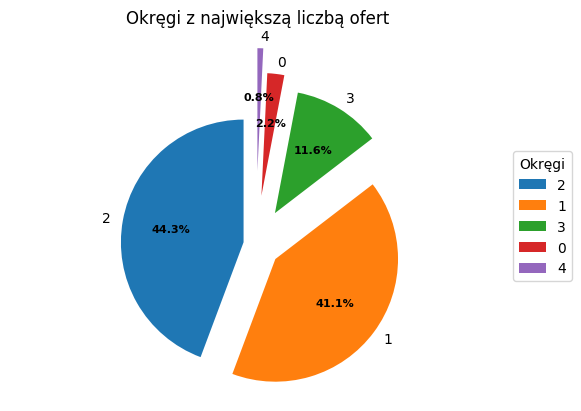

In [197]:
labels = df.neighbourhood_group.value_counts().index
sizes = df.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=False, startangle=90)
ax.axis('equal')
ax.set(title="Okręgi z największą liczbą ofert")
ax.legend(wedges, labels,
          title="Okręgi",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

Wykres kołowy pozwala na zobrazowanie wielkości zajmowanego "kawałka tortu" przez dwa największe okręgi pod względem ilości ofert mieszkanowych na serwisie AirBnb. Razem zajmują ponad 85% wszystkich ofert portalu. Swoją niszę ma także Queens, które zajmuje 11,6% i plasuje się na pozycji trzeciej. Bronx i Staten Island praktycznie nie liczą się w tym aspekcie, a ilość ogłoszeń może powodować o ich ekskluzywności. Jeśli dana osoba szukałaby oferty w tych okolicach musiałaby liczyć się z trudnością w odnalezieniu pasującego ogłoszenia.

## Top 3 wynajmujących pod względem liczby wyświetleń

Podział na największą ilość wyświetleń pozwala na sprawdzenie popularności serwisu oraz jego ofert. Oferta z największą ilością wyświetleń badanego okresu wynosi dokładnie 629. W takim razie oferty w Nowym Jorku mogą przyciągać do siebie kilkuset użytkowników serwisu.

In [214]:
rev_group = pd.DataFrame(df.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Liczba recenzji'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed


,Host ID,Liczba wyświetleń
0,47621202,629
1,4734398,607
2,4734398,597


## Top 3 wynajmujących pod względem liczby miesięcznych wyświetleń

Wyświetlenia ofert serwisu w skali miesięcznej pozwolą na wizualizację popytu użytkowników w mniejszym okresie.

In [199]:
gr = pd.DataFrame(df.groupby('reviews_per_month').sum()['host_id'])
rev = (gr.sort_values('reviews_per_month',ascending=False)).head(3)
rev.columns = ['Host ID']
rev['Liczba recenzji na miesiąc'] = rev.index
rev.reset_index(drop=True, inplace=True)
rev

,Host ID,Wyświetlenia na miesiąc
0,244361589,58.50
1,244361589,27.95
2,228415932,20.94


## Oferty według typu pokoju/apartamentu

Podczas korzystania z serwisu AirBnB możliwe będzie wynajęcie nie tylko całego mieszkania, ale również i współdzielonego pokoju, pojedynczego prywatnego pokoju, a nawet i całego wolnostojącego domu! W przypadku Nowego Jorku ta ostatnia wersja jest ekstremalną rzadkością, dlatego też możemy założyć, że kategoria "Entire home/apt" odnosi się w większości do apartamentów oraz różnego rodzaju mieszkań aniżeli całych domów w dosłownym znaczeniu. Poniższy wykres przedstawia rozkład wszystkich badanych tu ogłoszeń podzielonych i zestawionych ze sobą właśnie na podstawie typu wynajmowanego obiektu.

()

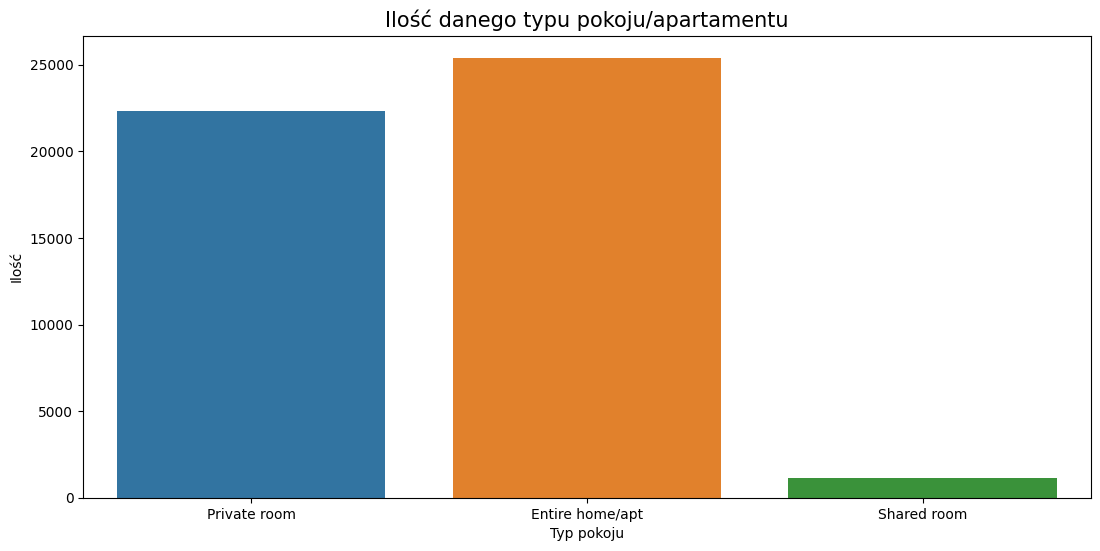

In [200]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='room_type')
plt.title('Ilość danego typu pokoju/apartamentu', fontsize=15)
plt.xlabel('Typ pokoju')
plt.ylabel("Ilość")
()

Powyższy podział na rodzaje wynajmowanego mieszkania pozwala na obserwację niewielkiej różnicy w ilościach ogłoszeń pomiędzy jednym pokojem, a całym apartamentem na korzyść apartamentów oraz niewielkim wkładem w rynek pokojów dzielonych z lokatorem "shared room". Może to być spowodowane wieloma czynnikami. Najbardziej prawdopodobnym z nich jest fakt, że współdzielony pokój zapewnia bardzo niewielką przestrzeń prywatną, co dla wielu może przekreślić nawet najbardziej atrakcyjną ofertę pod względem położenia czy też nawet ceny.

Wynajmowanie prywatnego pokoju natomiast cieszy się bardzo dużą popularnością. Pozwala ona często na pasywny dochód dla właściciela mieszkania, ale niesie za sobą kolejne koszta, zarówno w postaci materialnej jak i wcześniej wspomnianej prywatności.

Ogłoszenia całych mieszkań jest zarezerwowane dla osób zamożnych, które najprawdopodobniej posiadają kolejną nieruchomość, która mogą wykorzystać jako swój dom, a poprzez wynajęcie zapewniają sobie dochód oraz potencjalnie nowe znajomości.

()

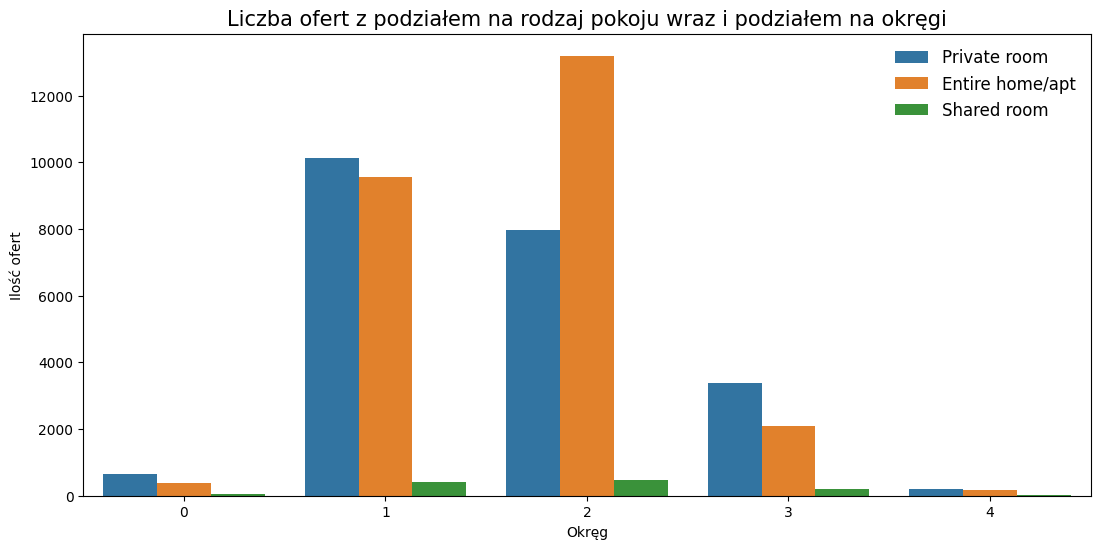

In [201]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Liczba ofert z podziałem na rodzaj pokoju wraz i podziałem na okręgi', fontsize=15)
plt.xlabel('Okręg')
plt.ylabel("Ilość ofert")
plt.legend(frameon=False, fontsize=12) 
()

Jak widać na powyższym wykresie, ilość wynajmowanych mieszkań jest największa na Manhattan'ie. Pokrywa się z wcześniejszym wnioskiem dotyczącym zamożności właściciela oraz wynajmowaniem całego mieszkania wyłącznie w celach zarobkowych. 

Proporcja współdzielonego pokoju pozostała na bardzo podobnym poziomie dla wszystkich badanych okręgów.

Ciekawym wynikiem jest natomiast większa ilość wynajmowanych prywatnych pokojów w porównaniu do całych mieszkań. Jest to prawdopodobnie uwarunkowane niższymi cenami i jak będzie to przedstawione na kolejnych wykresach, ceny pomiędzy okręgami mogą się różnić nawet kilkukrotnie dla mieszkania czy też pokoju z podobnego poziomu. Kolejnym powodem może być ogromna przewaga wynajmowania całych mieszkań ponad pokojami na Manhattan'ie, natomiast w rozrachunku dla całego Nowego Jorku, nie widzimy aż takiej różnicy.

Ciekawa wizualizacja sporej przewagi ilości ofert apartamentów nad pokojami w Manhatanie i niewielkiej przewagi pokojów w pozostałych okręgach. 

## Rozkłady cen ogłoszeń dla każdego z okręgów

Ze względu na ogromną różnicę w ilości ogłoszeń pomiędzy Manhattanem czy też Brooklynem, a pozostałymi dzielnicami, ciekawym punktem zaczepienia będzie zestawienie ich cen ze względu na położenie. W tym celu, skorzystamy z wykresu skrzypcowego z podziałem na główne badane okręgi. Pozwoli to określić w jaki sposób rozkładają się ceny mieszkań w każdym z nich. Ze względu na rozstrzał danych w kategori cen, konieczne jest jej ograniczenie do pewnej wartości. Uważamy, że górną granicą za jedną noc może być kwota $500. 

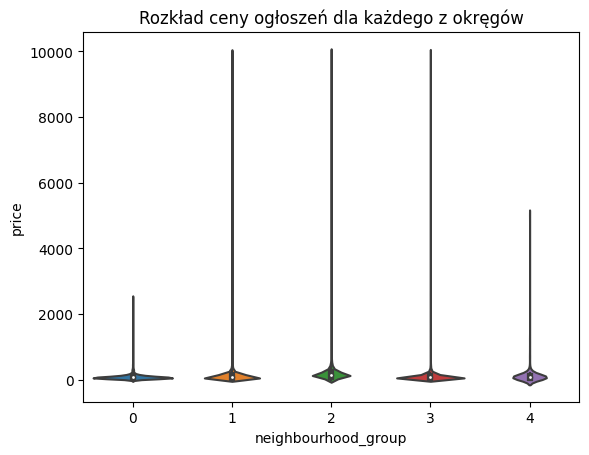

In [202]:
violin=sns.violinplot(data=df, x='neighbourhood_group', y='price').set(title="Rozkład ceny ogłoszeń dla każdego z okręgów")

Powyższy wykres nie jest czytelny, ponieważ ekstrema rozciągają go. Usuńmy wartości cen dla apartamentów dla powyżej $500.

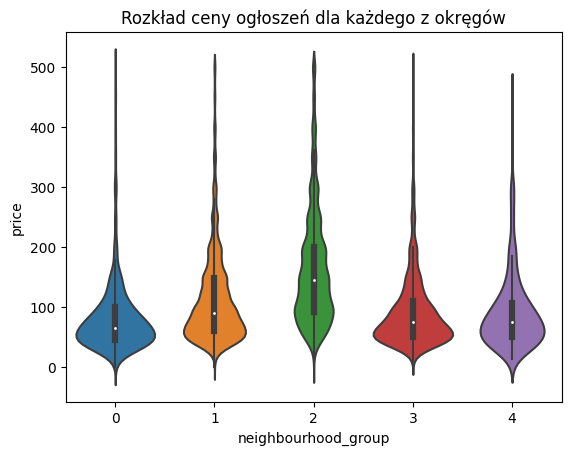

In [203]:
sub=df[df.price <= 500]
viol=sns.violinplot(data=sub, x='neighbourhood_group', y='price').set(title="Rozkład ceny ogłoszeń dla każdego z okręgów")

Powyższy wykres pokazuje, jak bardzo różni się docelowy rynek pomiędzy Manhattan'em, a resztą Nowego Jorku. 

Dla każdego z pozostałych okręgów możemy zaobserwować widoczne "wybrzuszenie się" naszych skrzypiec w dolnych granicach, gdzieś około wartości $60 - $70 i potem mniej lub bardziej gwałtowny spadek ilości ogłoszeń, aż do osiągnięcia bardzo niewielkiej szerokości naszych wykresów. Średnia wartość plasuje się w okolicach $80 dla Brooklynu, Queens, Staten Island oraz Bronxu.

Sytuacja wygląda zgoła inaczej w przypadku Manhattanu. Sama średnia kwota, którą musimy zapłacić wynosi w przybliżeniu $150. Nie jesteśmy w stanie również zaobserwować tak dużej ilości ogłoszeń w podobnej cenie, jako że ilość ogłoszeń maleje w znacznie wolniejszym tempie w porównaniu do pozostałych okręgów. Widzimy również zwężenie do minimalnej szerokości następuje gdzieś w okolicy $400, gdzie dla reszty dzieję się to przy około $300. Pokazuje to, że w tym miejscu możemy znaleźć znacznie bardziej różnorodne mieszkania o różnych standardach, co jest mnożone poprzez umiejscowienie geograficzne w okolicy ludzi sukcesu oraz bogaczy.

Ze względu na ciekawe wyniki powyższych odczytów, sprawdzmy jak statystycznie wyglądają ceny w poszczególnych dzielnicach.
Poniżej umieściliśmy dane z cen dla każdej z dzielnic w jednej liście.

In [204]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

Teraz utworzymy tabelę, która pokaże nam, jak wyglądają poszczególne kwartyle dla każdego z okręgów. Pozwoli to nam określić, jak na przestrzeni całego zbioru plasują się określone mieszkania i jakich kategorii cenowych możemy oczekiwać.

In [205]:
data_table=[]
name_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Zbieranie statystyk dla cen określonych przez centyle

for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    data_table.append(i)
    
#
#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(5):
    data_table[i].rename(columns={'price':name_list[i]}, inplace=True)  
data_table=[df.set_index('Stats') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


Widzimy, że niektóre ogłoszenia nie wymagają inwestycji pieniężnej w celu znalezienia noclegu (przynajmniej jest to prawdą na Brooklynie, Manhattanie oraz Bronxie). 

Kolejne progi procentowe powoli pozwalają nam na określenie gdzie mieszkanie będzie bardziej lub mniej pożądane. Już przy 25% widzimy znaczną różnicę, gdzie na Manhattan'ie zapłacimy ponad dwukrotność mieszkania na Bronx'ie! Nie ma tutaj mowy o standardzie danego pokoju, dlatego też ciężko ocenić czy ta różnica wynika tylko i wyłącznie z umiejscowienia geograficznego. Na ten fakt z pewnością wpływa również to, że ogłoszeń na okręgach Queens, Staten Island oraz Bronx jest blisko 3-krotnie mniej sumarycznie niż na samym Manhattan'ie.

Kolejne progi tylko ugruntowują statystykę, że najdroższym miejscem do skorzystania z serwisu AirBnB jest Manhattan, następnie ze sporą różnicą uplasował się Brooklyn, później przy takich samych wynikach widzimy Queens oraz Staten Island, a Bronx pomimo swojego położenia stosunkowo blisko Manhattanu, okazał się najtańszy. 

Maksymalne ogłoszenie w każdym z okręgów uplasowało się znacznie wyżej niż pozostałe, ale ponownie widzimy tutaj znacznie niższą cenę na Bronx'ie, co tylko utwierdza wcześniej wysunięty wniosek.

## Mapa Nowego Jorku

Na mapie Nowego Jorku zostały narzucone koordynaty wszystkich obiektów dostępnych na wynajem z naszej bazy danych. Przedstawione zostały w formie mapy cieplnej, która charakteryzuje się co raz to intensywniejszym kolorem w zależności od ilości mieszkań w tej okolicy. 

Wnioski z tej mapy pokrywają się w wizualny sposób z poprzednimi badaniami. Widzimy tutaj, że na Staten Island ilość mieszkań jest bardzo mała, a większość z nich jest umiejscowiona niedaleko mostu łączącego ją z Brooklyn'em. Podobną charakterystyką można opisać Bronx oraz Queens, chociaż w tych przypadkach odległość dzieląca mieszkania jest większa, ponieważ nie są tak scentralizowane jak na Staten Island. 

Drugą pod względem ilości dostępnych na wynajem mieszkań jest Brooklyn. Widzimy tutaj znacznie większe zagęszczenie w porównaniu do poprzednich okręgów. Ilość mieszkań rośnie odwrotnie proporcjonalnie do odległości od Manhattanu, gdzie pomimo mniejszej powierzchni od pozostałych hrabstw, widzimy czerwone punkty na mapie oraz nieprzerwaną falę pomarańczowego koloru na około central parku. Zgadza się to z założeniem, że manhattan jest najsławniejszym oraz najbogatszym okręgiem z badanych, dlatego też ludzie z pewnością są bardziej skłonni właśnie tam pozostać na noc.

In [206]:
import folium
import folium.plugins

map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(df[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

ModuleNotFoundError: No module named 'folium'